# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data = fetch_20newsgroups()

In [4]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
len(data['data'])

11314

In [8]:
data['data'][2000]

'From: cdw2t@dayhoff.med.Virginia.EDU (Dances With Federal Rangers)\nSubject: Re: Misc./buying info. needed\nOrganization: University of Virginia\nLines: 28\n\nIn article <1993Apr18.160449.1@hamp.hampshire.edu> jyaruss@hamp.hampshire.edu writes:\n\n>Is there a buying guide for new/used motorcycles (that lists reliability, how\n>to go about the buying process, what to look for, etc...)?\n\n_Cycle World_ puts one out, but I\'m sure it\'s not very objective.  Try talking\nwith dealers and the people that hang out there, as well as us.  We love to\ngive advice.\n\n>Is there a pricing guide for new/used motorcycles (Blue Book)?\n\nMost of the bigger banks have a blue book which includes motos -- ask for the\none with RVs in it.\n\n>Are there any books/articles on riding cross country, motorcycle camping, etc?\n\nCouldn\'t help you here.\n\n>Is there an idiots\' guide to motorcycles?\n\nYou\'re reading it.\n\n----------------------------------------------------------------------------\n|    

In [12]:
data['target']

array([7, 4, 4, ..., 3, 1, 8])

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [13]:
v1 = TfidfVectorizer()
X_train = v1.fit_transform(data['data'])
X_train

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [17]:
X_train.todense()[0].min(), X_train.todense()[0].max()

(0.0, 0.38133891259493113)

In [18]:
p1 = {
    'n_estimators':[10,20],
    'max_depth': [None, 7]
}

In [19]:
clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5,n_jobs=-1, verbose=1)
gs1.fit(X_train, data['target'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:   17.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 20}

In [22]:
test_sample = v1.transform(["Sample text"])
test_sample.shape

(1, 130107)

In [25]:
#best_clf = gs1.best_estimator_
pred = gs1.predict(test_sample)
pred

array([1])

In [26]:
data['target_names'][pred[0]]

'comp.graphics'

### GridSearch with BOTH the Vectoizer & Classifier

In [27]:
from sklearn.pipeline import Pipeline

# 1. Create a pipeline with a vectorize and a classifier
# 2. Use Grid Search to optimize the entire pipeline

v2 = TfidfVectorizer()
clf = RandomForestClassifier()

pipe = Pipeline([
    ('vect', v2),
    ('clf', clf)
])

p2 = {
    'vect__max_features': [1000, 5000],
    'clf__n_estimators': [10, 30],
    'clf__max_depth': [None, 7]
}

gs2 = GridSearchCV(pipe, p2, cv=3, n_jobs=-1)
gs2.fit(data['data'], data['target'])

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [28]:
gs2.best_params_

{'clf__max_depth': None, 'clf__n_estimators': 30, 'vect__max_features': 5000}

In [34]:
pred = gs2.predict(["""Previous studies have found that hunger follows a daily rhythm and that this rhythm is, in some ways, not what people might expect. Although people typically cease eating during an extended period of sleep, they break that fast with what is often the smallest meal of the day.

Meanwhile, hunger tends to be strongest late in the day, peaking at about 8:00 p.m., after most people have completed the majority of their daily activities.

EI consumption naturally tends to be a response to hunger, and other research has investigated the effect of meal timing on metabolism and other bodily processes. The new study, however, looks at its implications for the quantity and quality of food that people consume."""])

In [35]:
pred

array([13])

In [36]:
data['target_names'][pred[0]]

'sci.med'

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [37]:
# Download spacy model
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [38]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.DataFrame({
    'content': data['data'],
    'target': data['target'],
    'target_names': [data['target_names'][i] for i in data['target']]
})
df

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [47]:
# For reference on regex: https://docs.python.org/3/library/re.html

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# From 'content' column: 
# 1. Remove extra whitespace 
df['content'] = df['content'].apply(lambda x: x.strip())

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# 2. Remove Emails
df['content'] = df['content'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \S
<>:2: DeprecationWarning: invalid escape sequence \S
<>:2: DeprecationWarning: invalid escape sequence \S
<ipython-input-49-062306a2b703>:2: DeprecationWarning: invalid escape sequence \S
  df['content'] = df['content'].apply(lambda x: re.sub('From: \S+@\S+', '', x))


In [50]:
df['content']

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         (where's my thing)\nSubject: WHAT car is this...
1         (Guy Kuo)\nSubject: SI Clock Poll - Final Cal...
2         (Thomas E Willis)\nSubject: PB questions...\n...
3         (Joe Green)\nSubject: Re: Weitek P9000 ?\nOrg...
4         (Jonathan McDowell)\nSubject: Re: Shuttle Lau...
                               ...                        
11309     (Jim Zisfein) \nSubject: Re: Migraines and sc...
11310    \nSubject: Screen Death: Mac Plus/512\nLines: ...
11311     (Will Estes)\nSubject: Mounting CPU Cooler in...
11312     (Steven Collins)\nSubject: Re: Sphere from 4 ...
11313     (Kevin J. Gunning)\nSubject: stolen CBR900RR\...
Name: content, Length: 11314, dtype: object

In [51]:
# 3. Remove new line characters
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-51-a55e649520fe>:2: DeprecationWarning: invalid escape sequence \s
  df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))


In [52]:
df['content']

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         (where's my thing) Subject: WHAT car is this!...
1         (Guy Kuo) Subject: SI Clock Poll - Final Call...
2         (Thomas E Willis) Subject: PB questions... Or...
3         (Joe Green) Subject: Re: Weitek P9000 ? Organ...
4         (Jonathan McDowell) Subject: Re: Shuttle Laun...
                               ...                        
11309     (Jim Zisfein) Subject: Re: Migraines and scan...
11310     Subject: Screen Death: Mac Plus/512 Lines: 22...
11311     (Will Estes) Subject: Mounting CPU Cooler in ...
11312     (Steven Collins) Subject: Re: Sphere from 4 p...
11313     (Kevin J. Gunning) Subject: stolen CBR900RR O...
Name: content, Length: 11314, dtype: object

In [53]:
# 4. Remove non-alphanumeric characters

df['content'] = df['content'].apply(lambda x: re.sub('[^0-9 a-zA-Z]', '', x))

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df['content']

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         wheres my thing Subject WHAT car is this Nntp...
1         Guy Kuo Subject SI Clock Poll  Final Call Sum...
2         Thomas E Willis Subject PB questions Organiza...
3         Joe Green Subject Re Weitek P9000  Organizati...
4         Jonathan McDowell Subject Re Shuttle Launch Q...
                               ...                        
11309     Jim Zisfein Subject Re Migraines and scans Di...
11310     Subject Screen Death Mac Plus512 Lines 22 Org...
11311     Will Estes Subject Mounting CPU Cooler in ver...
11312     Steven Collins Subject Re Sphere from 4 point...
11313     Kevin J Gunning Subject stolen CBR900RR Organ...
Name: content, Length: 11314, dtype: object

In [55]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
nlp = spacy.load("en_core_web_lg")

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
def get_lemmas(x):
    lemmas = []
    for token in nlp(x):
        if (token.is_stop!=True) and (token.is_punct!=True):
            lemmas.append(token.lemma_)
    return lemmas

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Process ForkPoolWorker-83:
Traceback (most recent call last):
  File "/home/akim/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/akim/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/akim/miniconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/akim/miniconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/akim/miniconda3/lib/python3.7/multiprocessing/sy

In [58]:
# Create 'lemmas' column

df['lemmas'] = df['content'].parallel_apply(get_lemmas)

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
df['lemmas'].iloc[100]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[' ',
 'TsungKun',
 'Chen',
 'Subject',
 ' ',
 'software',
 'forsale',
 'lot',
 ' ',
 'NntpPostingHost',
 'magnusugmagnusacsohiostateedu',
 'Organization',
 'Ohio',
 'State',
 'University',
 ' ',
 'post',
 'friend',
 '  ',
 'JK',
 'Lee',
 '6147910748',
 'drop',
 'mail',
 ' ',
 'Distribution',
 'usa',
 'line',
 '39',
 '1',
 'software',
 'publish',
 'SuperBase',
 '4',
 'window',
 'v13',
 '80',
 '2',
 'OCR',
 'system',
 'ReadRight',
 'v31',
 'Windows',
 '65',
 '3',
 'OCR',
 'System',
 'ReadRight',
 'v201',
 'DOS',
 '65',
 '4',
 'Unregistered',
 'Zortech',
 '32',
 'bit',
 'c',
 'compiler',
 'v31',
 ' ',
 '250',
 'Multiscope',
 'window',
 'Debugger',
 'WhiteWater',
 'Resource',
 'Toolkit',
 'Library',
 'Source',
 'Code',
 '5',
 'glockenspielimagesoft',
 'Commonview',
 '2',
 'Windows',
 'Applications',
 'Framework',
 'Borland',
 'C',
 '70',
 '6',
 'Spontaneous',
 'Assembly',
 'Library',
 'Source',
 'Code',
 '50',
 '7',
 'Microsoft',
 'Macro',
 'Assembly',
 '60',
 '50',
 '8',
 'Microsoft',
 '

### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [63]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemmas'])

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
id2word[300]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'bug'

In [66]:
df['content'][5]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' Foxvog Douglas Subject Re Rewording the Second Amendment ideas Organization VTT Lines 58 In article 1r1eu14ttransferstratuscom cdtswstratuscom C D Tavares writes In article 1993Apr2008305716899ousrvroulufi dfovttoulutkovttfi Foxvog Douglas writes  In article 1qv87v4j3transferstratuscom cdtswstratuscom C D Tavares writes  In article C5n3GIF8Fulowellulowelledu jrutledgcsulowelledu John Lawrence Rutledge writes    The massive destructive power of many modern weapons makes the   cost of an accidental or crimial usage of these weapons to great   The weapons of mass destruction need to be in the control of   the government only Individual access would result in the   needless deaths of millions This makes the right of the people   to keep and bear many modern weapons nonexistant  Thanks for stating where youre coming from Needless to say I  disagree on every count  You believe that individuals should have the right to own weapons of  mass destruction I find it hard to believe that you woul

In [71]:
id2word[255]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'article'

In [67]:
corpus[5]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 15),
 (9, 1),
 (12, 1),
 (46, 1),
 (49, 1),
 (64, 1),
 (91, 1),
 (92, 1),
 (108, 1),
 (109, 1),
 (132, 1),
 (162, 1),
 (165, 1),
 (190, 2),
 (225, 1),
 (233, 5),
 (255, 5),
 (269, 1),
 (279, 5),
 (302, 1),
 (321, 1),
 (322, 3),
 (333, 1),
 (341, 1),
 (342, 1),
 (343, 1),
 (344, 1),
 (345, 1),
 (346, 1),
 (347, 1),
 (348, 1),
 (349, 2),
 (350, 1),
 (351, 2),
 (352, 3),
 (353, 1),
 (354, 1),
 (355, 2),
 (356, 2),
 (357, 1),
 (358, 1),
 (359, 3),
 (360, 1),
 (361, 1),
 (362, 1),
 (363, 1),
 (364, 1),
 (365, 2),
 (366, 1),
 (367, 1),
 (368, 1),
 (369, 1),
 (370, 1),
 (371, 1),
 (372, 1),
 (373, 1),
 (374, 3),
 (375, 1),
 (376, 1),
 (377, 1),
 (378, 2),
 (379, 1),
 (380, 2),
 (381, 1),
 (382, 1),
 (383, 1),
 (384, 1),
 (385, 1),
 (386, 1),
 (387, 1),
 (388, 1),
 (389, 1),
 (390, 1),
 (391, 1),
 (392, 1),
 (393, 1),
 (394, 7),
 (395, 1),
 (396, 1),
 (397, 1),
 (398, 1),
 (399, 1),
 (400, 1),
 (401, 1),
 (402, 1),
 (403, 1),
 (404, 1),
 (405, 1),
 (406, 1),
 (407, 1),
 (408, 1),
 (409, 1

In [72]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(' ', 15),
 ('Lines', 1),
 ('Organization', 1),
 ('thank', 1),
 ('year', 1),
 ('Subject', 1),
 ('not', 1),
 ('number', 1),
 ('usage', 1),
 ('   ', 1),
 ('access', 1),
 ('give', 1),
 ('great', 1),
 ('people', 2),
 ('use', 1),
 ('  ', 5),
 ('article', 5),
 ('point', 1),
 ('write', 5),
 ('check', 1),
 ('quote', 1),
 ('right', 3),
 ('understanding', 1),
 ('1993apr2008305716899ousrvroulufi', 1),
 ('1qv87v4j3transferstratuscom', 1),
 ('1r1eu14ttransferstratuscom', 1),
 ('58', 1),
 ('Amendment', 1),
 ('Brady', 1),
 ('C5n3GIF8Fulowellulowelledu', 1),
 ('CBW', 1),
 ('D', 2),
 ('Doug', 1),
 ('Douglas', 2),
 ('Foxvog', 3),
 ('Individual', 1),
 ('Investors', 1),
 ('John', 2),
 ('Lawrence', 2),
 ('Needless', 1),
 ('Packet', 1),
 ('Rutledge', 3),
 ('SKS', 1),
 ('Sarah', 1),
 ('Second', 1),
 ('Street', 1),
 ('Sweeper', 1),
 ('Tavares', 2),
 ('VTT', 1),
 ('accidental', 1),
 ('agree', 1),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bear', 1),
 ('believe', 3),
 ('bill', 1),

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [ ]:
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)

# # # https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# lda_model.save('lda_model.model')

In [75]:
# %%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)

# # https://radimrehurek.com/gensim/models/ldamulticore.html

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_multicore.save('lda_multicore.model')

In [76]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### View the topics in LDA model

In [78]:
pprint(lda_multicore.print_topics())
doc_lda = lda_multicore[corpus]

[(0,
  '0.023*" " + 0.007*"launch" + 0.006*"ground" + 0.006*"orbit" + 0.006*"space" '
  '+ 0.005*"wire" + 0.004*"satellite" + 0.004*"Space" + 0.004*"circuit" + '
  '0.004*"mission"'),
 (1,
  '0.047*" " + 0.015*"not" + 0.010*"people" + 0.009*"write" + 0.008*"  " + '
  '0.008*"think" + 0.007*"God" + 0.006*"know" + 0.006*"article" + '
  '0.006*"believe"'),
 (2,
  '0.055*" " + 0.053*"1" + 0.034*"2" + 0.030*"0" + 0.021*"3" + 0.017*"4" + '
  '0.014*"5" + 0.012*"7" + 0.012*"25" + 0.011*"6"'),
 (3,
  '0.012*"outlet" + 0.009*"wiring" + 0.008*"NT" + 0.006*"neutral" + '
  '0.005*"C650" + 0.005*"yeast" + 0.004*"disc" + 0.004*"SE" + 0.003*"Candida" '
  '+ 0.003*"sinus"'),
 (4,
  '0.020*" " + 0.005*"year" + 0.005*"Organization" + 0.004*"Subject" + '
  '0.004*"University" + 0.004*"use" + 0.004*"1993" + 0.004*"program" + '
  '0.003*"space" + 0.003*"report"'),
 (5,
  '0.009*"Gainey" + 0.006*"Weaver" + 0.005*"BeHanna" + 0.005*"Bob" + '
  '0.004*"Chris" + 0.003*"behannasylnjneccom" + 0.003*"plane" + 0.00

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### What is topic Perplexity?
Perplexity is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of , you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents.

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”

In [79]:
# Compute Perplexity
print('\nPerplexity: ', lda_multicore.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_multicore, 
                                     texts=df['lemmas'], 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -10.879445632491258

Coherence Score:  0.5216363367119417


# Part 3: Interpret LDA results & Select the appropriate number of topics

In [81]:
data['target_names']

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [80]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
vis

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.253534 -0.081135       1        1  18.786488
18    -0.239541  0.065416       2        1  16.457098
8     -0.218959  0.104272       3        1  14.207382
15    -0.208579 -0.086865       4        1   7.622657
4     -0.180151 -0.016348       5        1   7.241427
13    -0.187793 -0.128478       6        1   7.068713
6     -0.203963 -0.007799       7        1   6.833530
16    -0.161374 -0.006652       8        1   4.857025
2     -0.024478  0.337815       9        1   4.846527
0     -0.099200 -0.014805      10        1   3.416130
17    -0.023187 -0.109358      11        1   2.521300
9      0.042146  0.063154      12        1   1.663680
10     0.239471  0.024628      13        1   1.113211
14     0.123301 -0.013775      14        1   0.955535
12     0.148145  0.004981      15        1   0.753288
3      0.232151 -0.028506      16        1   0.595426
7      0.216807 -0.036679      17        1   0.418269
11     0.250479 -0.018753      18        1   0.319892
5      0.263357 -0.026557      19        1   0.212611
19     0.284902 -0.024558      20        1   0.109810, topic_info=                                  Term          Freq         Total Category  \
0                                       85684.000000  85684.000000  Default   
8249   maxaxaxaxaxaxaxaxaxaxaxaxaxaxax   3202.000000   3202.000000  Default   
1780                                 x   3433.000000   3433.000000  Default   
693                                  1   6303.000000   6303.000000  Default   
921                                  2   4777.000000   4777.000000  Default   
...                                ...           ...           ...      ...   
32280                            whore      2.352228      9.826870  Topic20   
23155                               ET      2.639892     18.472122  Topic20   
13545                        celebrate      2.810518     50.407218  Topic20   
23183                         wireless      2.167546     12.212595  Topic20   
16427                        inference      2.224189     16.871158  Topic20   

       logprob  loglift  
0      30.0000  30.0000  
8249   29.0000  29.0000  
1780   28.0000  28.0000  
693    27.0000  27.0000  
921    26.0000  26.0000  
...        ...      ...  
32280  -6.7246   5.3844  
23155  -6.6092   4.8687  
13545  -6.5466   3.9274  
23183  -6.8064   5.0853  
16427  -6.7806   4.7880  

[1409 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
0          1  0.183406         
0          2  0.141777         
0          3  0.381413         
0          4  0.048445         
0          5  0.030858         
...      ...       ...      ...
49        16  0.000260     year
49        17  0.000260     year
8480      15  0.018578    yeast
8480      16  0.966066    yeast
18942     11  0.986845  zionist

[4550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 19, 9, 16, 5, 14, 7, 17, 3, 1, 18, 10, 11, 15, 13, 4, 8, 12, 6, 20])

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# %%time
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=40, step=6)

In [82]:
coherence_values = [0.5054, 0.5332, 0.5452, 0.564, 0.5678, 0.5518, 0.519]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


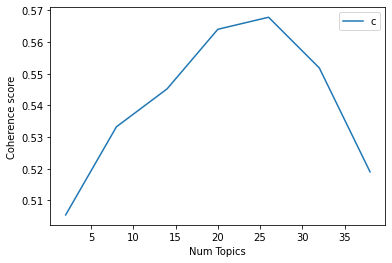

In [83]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [84]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5054
Num Topics = 8  has Coherence Value of 0.5332
Num Topics = 14  has Coherence Value of 0.5452
Num Topics = 20  has Coherence Value of 0.564
Num Topics = 26  has Coherence Value of 0.5678
Num Topics = 32  has Coherence Value of 0.5518
Num Topics = 38  has Coherence Value of 0.519


/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Select the model and print the topics
#optimal_model = model_list[4]
optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(25,
  '0.009*"VAXVMS" + 0.009*"VNEWS" + 0.009*"NewsSoftware" + 0.008*"Maria" + '
  '0.008*"Brian" + 0.007*"141" + 0.005*"obscure" + 0.005*"GL" + 0.005*"de" + '
  '0.004*"beep"'),
 (8,
  '0.022*"dog" + 0.010*"DOS" + 0.005*"Nick" + 0.005*"        " + '
  '0.004*"Pettefar" + 0.004*"do" + 0.004*"ryancousineaucompdynquestororg" + '
  '0.004*"Cousineau" + 0.004*"2500" + 0.004*"MPC"'),
 (7,
  '0.021*" " + 0.008*"not" + 0.005*"Gordon" + 0.005*"patient" + 0.005*"doctor" '
  '+ 0.005*"drug" + 0.005*"article" + 0.004*"Organization" + 0.004*"use" + '
  '0.004*"write"'),
 (14,
  '0.019*"absolute" + 0.015*"truth" + 0.009*"Darren" + 0.009*"Mormon" + '
  '0.008*"Jumper" + 0.006*"ye" + 0.005*"Lucifer" + 0.004*"LDS" + '
  '0.004*"holland" + 0.004*"craig"'),
 (22,
  '0.009*"Weiss" + 0.006*"IR" + 0.005*"cursor" + 0.004*"Bethesda" + '
  '0.004*"Diamond" + 0.004*"Meritt" + 0.004*"presentation" + 0.004*"Integra" + '
  '0.004*"driver" + 0.004*"Joseph"'),
 (5,
  '0.014*" " + 0.008*"space" + 0.008*"Space" + 0

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
df['content']

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         wheres my thing Subject WHAT car is this Nntp...
1         Guy Kuo Subject SI Clock Poll  Final Call Sum...
2         Thomas E Willis Subject PB questions Organiza...
3         Joe Green Subject Re Weitek P9000  Organizati...
4         Jonathan McDowell Subject Re Shuttle Launch Q...
                               ...                        
11309     Jim Zisfein Subject Re Migraines and scans Di...
11310     Subject Screen Death Mac Plus512 Lines 22 Org...
11311     Will Estes Subject Mounting CPU Cooler in ver...
11312     Steven Collins Subject Re Sphere from 4 point...
11313     Kevin J Gunning Subject stolen CBR900RR Organ...
Name: content, Length: 11314, dtype: object

In [88]:
X = [nlp(doc_str).vector for doc_str in df['content'].iloc[:500]]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
len(X)

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500

In [92]:
X[0]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 6.49627000e-02,  1.72942400e-01, -1.35103658e-01, -4.95198295e-02,
        1.29333496e-01, -2.27665883e-02, -3.40190828e-02, -1.59262538e-01,
       -4.76956815e-02,  2.11056066e+00, -1.90587997e-01,  2.84368619e-02,
        7.72864595e-02, -4.35103886e-02, -1.20283395e-01, -6.05300777e-02,
       -9.24635008e-02,  1.09331322e+00, -1.04713582e-01, -7.70829171e-02,
        1.63354017e-02, -1.11703359e-01, -5.84971113e-03, -6.72326074e-04,
       -1.83199309e-02,  2.22165305e-02, -6.67345598e-02, -3.23292576e-02,
       -4.76965867e-03,  1.63094854e-04,  3.27783115e-02,  6.64760470e-02,
       -9.30016395e-03,  7.82725364e-02,  2.62791142e-02, -4.33743112e-02,
       -4.57467809e-02,  7.00696260e-02, -9.43757445e-02, -6.07523695e-02,
       -4.77724010e-03,  9.09976289e-02, -1.77201291e-03, -1.96540635e-02,
        4.87061627e-02,  6.86471909e-02, -1.03824727e-01, -8.38322565e-02,
        4.95778471e-02,  1.10743474e-02, -5.53632677e-02,  1.08983675e-02,
        1.04528125e-02,  

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20)
kmeans.fit(X)

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
kmeans.labels_

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 4, 13,  5,  3, 13, 17, 16, 13, 10, 13, 14,  9,  6, 19, 14,  9,  5,
       14,  5, 10,  9, 11, 10, 13, 13, 10, 17,  6,  9,  4,  5,  4, 19, 15,
       15, 11,  4,  5, 14,  4, 11, 18, 18, 11, 11, 16,  7, 16, 16, 19, 13,
        9, 10, 17, 15,  3,  4,  1, 10, 19,  6, 10, 18,  6, 19,  9,  8, 15,
        0,  8, 15,  9, 14, 14,  8, 14,  5, 14, 10, 13,  0, 11, 19,  8,  4,
        3, 13,  3,  1,  3, 10,  0, 13, 13, 16, 11, 19, 13, 15,  3,  7, 13,
       14,  6,  9, 13, 13, 13, 18,  8,  9, 13, 18, 11, 11,  9, 17,  3,  5,
       16,  9,  4, 16,  0,  9, 13,  1,  4,  1,  4,  3, 17, 18,  0,  5,  9,
       11, 18, 18,  0, 19, 12, 18, 14, 12, 17, 10,  9,  9, 17,  3,  8,  0,
       19, 16, 13, 14,  9, 16, 17, 15, 15, 18,  9,  6, 10, 11,  2,  5,  8,
       17, 10,  1, 18, 11, 13,  6, 17, 13,  6, 17, 14, 17,  4,  4, 18, 11,
       16, 16,  5, 13,  2, 13, 17,  6, 18, 13,  0, 17, 18, 11, 14,  6,  9,
       13, 19, 13, 14, 11,  5,  9,  5, 15, 13, 13, 17,  8,  5, 17, 17, 17,
        9, 16, 16, 11,  5

In [97]:
kmeans.cluster_centers_

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.03011884,  0.0919892 , -0.09240624, ..., -0.01459576,
         0.00373113,  0.0621932 ],
       [-0.02128587,  0.12861456, -0.0946875 , ..., -0.0632641 ,
        -0.01760532,  0.08252365],
       [-0.10286831,  0.18308058, -0.08469541, ..., -0.08065693,
        -0.09260087,  0.13351642],
       ...,
       [-0.06502199,  0.1271009 , -0.11462541, ..., -0.06938158,
         0.01833629,  0.09441931],
       [-0.01493553,  0.14481361, -0.08716783, ..., -0.05867859,
        -0.02189718,  0.11950826],
       [-0.02326071,  0.12501206, -0.04013256, ..., -0.04111465,
        -0.02204668,  0.08281143]])

In [98]:
kmeans.inertia_

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


203.4194912288186

In [102]:
sum_of_sq_distances = []

for K in range(3, 50, 3):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    sum_of_sq_distances.append(kmeans.inertia_)

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Inertia (sum of squared distances)')

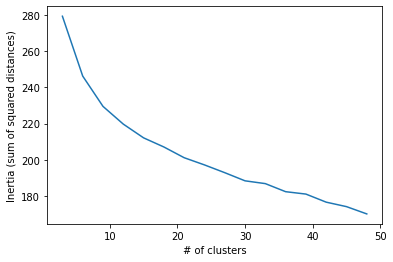

In [104]:
plt.plot(range(3, 50, 3), sum_of_sq_distances)
plt.xlabel('# of clusters')
plt.ylabel('Inertia (sum of squared distances)')

In [105]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
kmeans.labels_

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1,  5,  1,  9, 10,  6,  4,  5,  5,  5,  9, 11, 12,  0,  9,  6, 11,
        1,  0,  5,  6,  3,  5,  5,  5,  5,  1, 14, 11,  1,  1,  1,  8,  6,
        8,  3, 11, 11,  1,  1, 10,  9,  7,  3,  3,  9,  2,  9,  9,  8,  5,
       11,  5, 11,  6,  5,  1,  3,  5,  7, 14,  5,  2, 14,  8, 11,  2,  8,
        6,  2,  6, 10,  5,  1,  2,  0,  1,  1,  5,  5,  6, 10,  7,  7,  1,
        7,  5,  7,  3,  5,  5,  6,  5,  1,  9,  3,  8,  0,  8,  7,  2,  5,
        9, 14, 11,  0,  0,  0,  2,  2,  6,  0,  7, 10,  3, 11, 13,  5,  5,
        9, 11,  1,  5,  6, 11, 10,  8, 11,  3,  1,  7, 13,  7,  6,  1, 10,
       11,  9,  4,  6, 13, 12,  7,  9, 12, 11,  5, 11, 11,  8,  7,  2,  6,
        0,  5,  5,  1, 11, 10,  6,  8,  6,  9, 10,  2,  7,  1,  4, 11,  2,
        6,  5,  9,  9,  3,  1,  4,  6,  5, 14, 13,  1, 13,  1,  0,  5, 10,
        9,  5,  1,  5,  4,  5,  6,  2,  9,  0,  6,  6,  7, 10,  9, 14, 11,
       10,  9,  5,  1,  3, 11, 11,  5,  8,  5,  5, 13,  2,  1, 13,  6, 10,
       11,  9,  9,  3, 11

In [115]:
np.where(kmeans.labels_ == 14)[0]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 27,  60,  63, 103, 179, 202, 266, 312, 335, 400, 473, 493])

In [116]:
df['content'].iloc[np.where(kmeans.labels_ == 14)[0]]

/home/akim/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-2AapNZ9Q/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27      Doug Roberts Subject Re NL vs AL Organization...
60      Jason Blakey Subject FTP sites anyone NntpPos...
63      Subject Re CDs priced for immediate sale Arti...
103     Robert Horton Subject Re Macs suck Buy a PC N...
179     Dale Stephenson Subject Re Giants GM Quinn is...
202     Stewart Clamen Subject Re Binyamin Netanyahu ...
266     Gerald Olchowy Subject Re WC 93 Results April...
312     Edward A Shnekendorf Subject Happy Birthday I...
335     Michael C Davis Subject Love Europe Organizat...
400     Andy Hooper Subject Re text of White House an...
473     Subject Re This years biggest and worst opini...
493     Stephen Hite Subject Re Searching for xgolf O...
Name: content, dtype: object